# Análisis de datos - Venta de vehículos usados
## Proceso de Limpieza, Filtrado y Ordenamiento de los datos

El objetivo de este proyecto es predecir el precio de futuras ventas de vehículos utilizando las características de estos, también haremos un breve análisis de los datos.

Para comenzar, importamos el CSV (https://www.kaggle.com/datasets/tunguz/used-car-auction-prices/data) y categorizamos las columnas. También le damos formato de fecha a la columna "saledate".

In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/Bryan/Documents/Portafolio/Used-Car-Listings/car_prices.csv", sep=",", on_bad_lines="skip",
                 dtype={"year": int,
                        "make": object,
                        "model": object,
                        "trim": object,
                        "body": object,
                        "transmission": object,
                        "state": object,
                        "condition": float,
                        "odometer": float,
                        "color": object,
                        "interior": object,
                        "seller": object,
                        "mmr": float,
                        "sellingprice": float,
                        "saledate": object,
                        }).drop(["vin"], axis=1)

df["saledate"] = pd.to_datetime(df["saledate"], format="mixed", utc=True).dt.date

Para estandarizar los datos, utilizamos la misma estructura de mayúsculas y minúsculas en los datos.

In [3]:
df["make"] = df.make.str.upper()
df["model"] = df.model.str.capitalize()
df["body"] = df.body.str.lower()
df["transmission"] = df.transmission.str.lower()
df["state"] = df.state.str.upper()
df["color"] = df.color.str.capitalize()
df["interior"] = df.interior.str.capitalize()

In [4]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,KIA,Sorento,LX,suv,automatic,CA,5.0,16639.0,White,Black,"kia motors america, inc",20500.0,21500.0,2014-12-16
1,2015,KIA,Sorento,LX,suv,automatic,CA,5.0,9393.0,White,Beige,"kia motors america, inc",20800.0,21500.0,2014-12-16
2,2014,BMW,3 series,328i SULEV,sedan,automatic,CA,4.5,1331.0,Gray,Black,financial services remarketing (lease),31900.0,30000.0,2015-01-14
3,2015,VOLVO,S60,T5,sedan,automatic,CA,4.1,14282.0,White,Black,volvo na rep/world omni,27500.0,27750.0,2015-01-28
4,2014,BMW,6 series gran coupe,650i,sedan,automatic,CA,4.3,2641.0,Gray,Black,financial services remarketing (lease),66000.0,67000.0,2014-12-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,KIA,K900,Luxury,sedan,NaN,IN,4.5,18255.0,Silver,Black,avis corporation,35300.0,33000.0,2015-07-09
558807,2012,RAM,2500,Power Wagon,crew cab,automatic,WA,5.0,54393.0,White,Black,i -5 uhlmann rv,30200.0,30800.0,2015-07-08
558808,2012,BMW,X5,xDrive35d,suv,automatic,CA,4.8,50561.0,Black,Black,financial services remarketing (lease),29800.0,34000.0,2015-07-08
558809,2015,NISSAN,Altima,2.5 S,sedan,automatic,GA,3.8,16658.0,White,Black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,2015-07-08


Observamos los datos ya ordenados y estandarizados.

In [5]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [6]:
df.describe(include=object)

,make,model,trim,body,transmission,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558062,558062,558811,558811
unique,66,851,1975,45,2,38,20,17,14264,176
top,FORD,Altima,Base,sedan,automatic,FL,Black,Black,nissan-infiniti lt,2015-01-13
freq,93997,19349,55817,241343,475914,82945,110970,244325,19693,20928


De acuerdo a lo visto, haremos un drop a las columnas "trim", "state" "mmr" y "seller" a la hora de hacer las predicciones, ya que tienen datos que podrían afectar la predicción, no son relevantes y/o tienen datos complejos de estandarizar por la máquina.
Además, utilizaremos el método de OneHotEncoder solo para transmission, porque contiene pocos valores unicos en comparación a las demás columnas

## Transformación de los datos a información

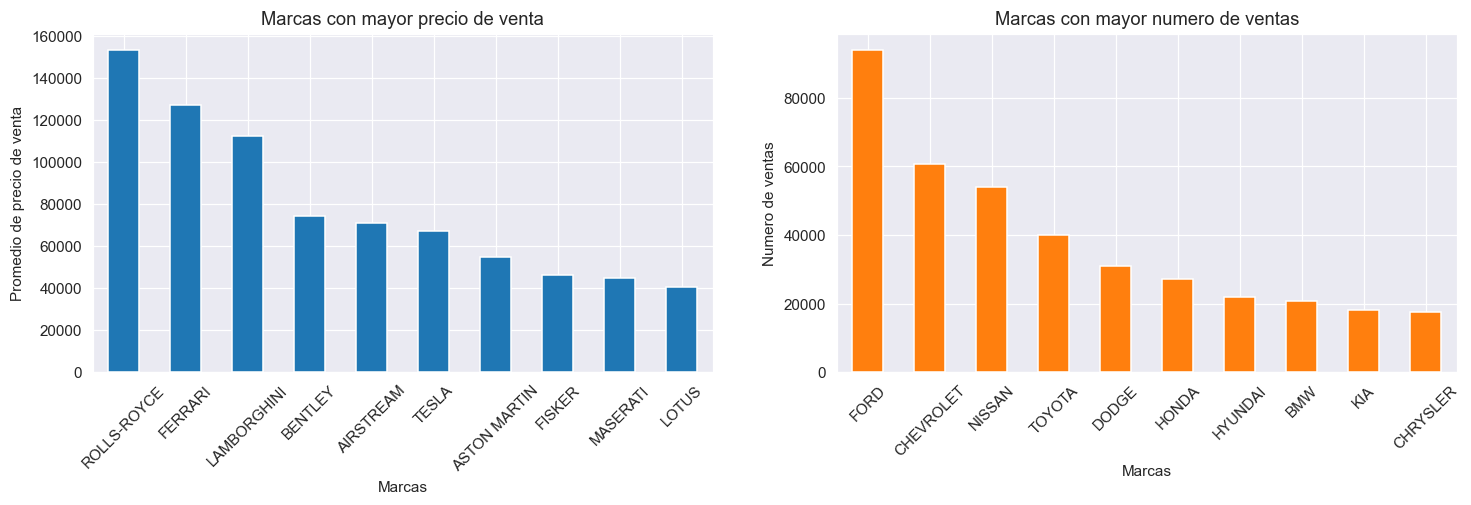

In [7]:
import matplotlib.pyplot as plt

fig, (ax, ax2) = plt.subplots(figsize=[16,4], ncols=2, dpi=110)

df[["make","sellingprice"]].groupby("make").mean().sort_values("sellingprice", ascending=False).iloc[:10].plot.bar(legend=False, ax=ax)
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Marcas")
ax.set_ylabel("Promedio de precio de venta")
ax.set_title("Marcas con mayor precio de venta")

df[["make","year"]].groupby("make").count().sort_values("year", ascending=False).iloc[:10].plot.bar(legend=False, ax=ax2, color="C1")
ax2.tick_params(axis="x", labelrotation=45)
ax2.set_xlabel("Marcas")
ax2.set_ylabel("Numero de ventas")
ax2.set_title("Marcas con mayor numero de ventas")
plt.savefig("graficos/most_sold_and_numbers.png");

En estos gráficos, se observa las 10 marcas de vehículo con mayores precios de venta y las 10 marcas con mayor números de ventas.

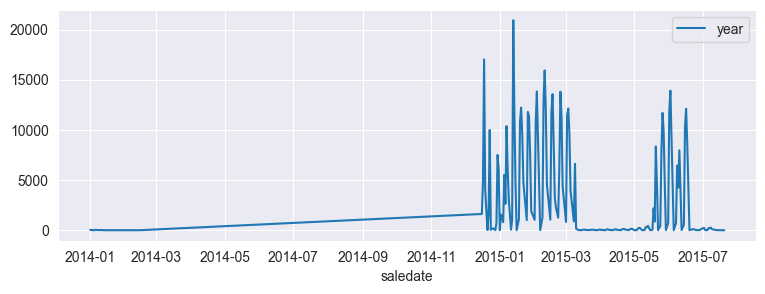

In [8]:
fig, ax = plt.subplots(figsize=[9,3])
df[["saledate","year"]].groupby("saledate").count().plot(ax=ax);

Graficamos los datos por fecha de venta. En este caso, se puede observar que el dataset no tiene un orden para las fechas de ventas, hay días que faltan y días que registran altas ventas, por lo que este dataset no nos servirá para analizarlo de forma histórica, ni para predecir en cuanto a futuras fechas.

Añadiremos una columna que solo registre los días de venta.

In [9]:
df["saledate"] = pd.to_datetime(df["saledate"], format="mixed")
df["day"] = df["saledate"].dt.day_name()

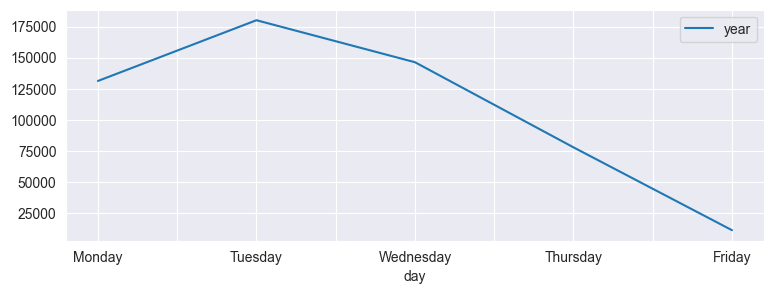

In [10]:
dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
x = df[["day","year"]].groupby("day").count()
x = x.reindex(dias, axis=0)

fig, ax = plt.subplots(figsize=[9,3])
x.plot(ax=ax);

En este gráfico, se observa los días con más ventas siendo martes, miércoles y lunes (en orden descendente), también se concluye que en los días sábado y domingo no hubo ventas.

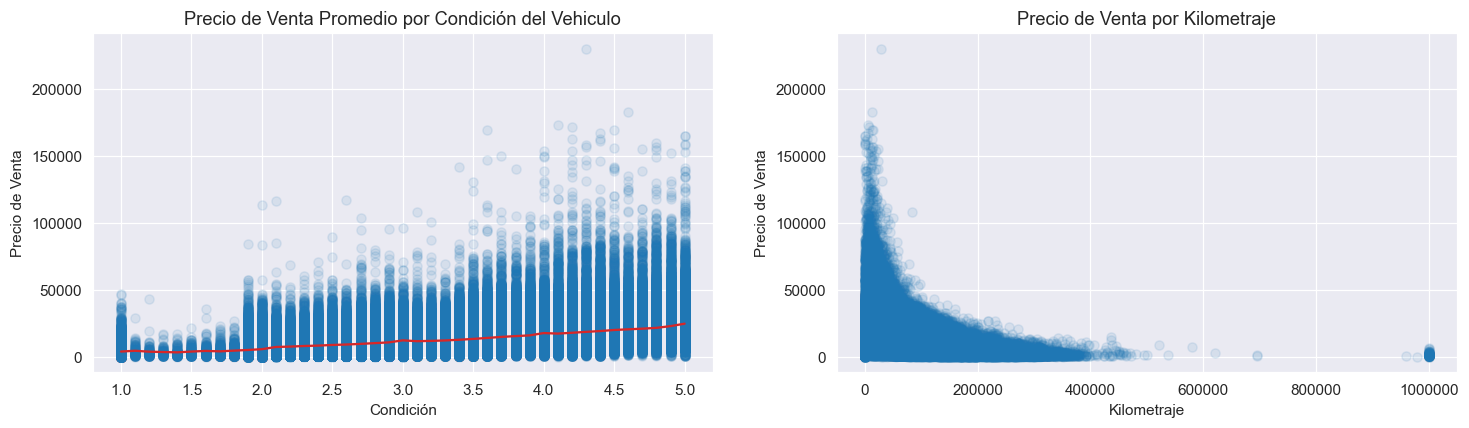

In [11]:
fig, (ax, ax2) = plt.subplots(figsize=[16,4], ncols=2, dpi=110)

ax.scatter(x=df["condition"], y=df["sellingprice"], alpha=0.1, color="C0")
df[["condition","sellingprice"]].groupby("condition").mean().sort_values("condition", ascending=True).plot(legend=False, ax=ax, color="C3")
ax.set_xlabel("Condición")
ax.set_ylabel("Precio de Venta")
ax.set_title("Precio de Venta Promedio por Condición del Vehiculo")

ax2.scatter(x=df["odometer"], y=df["sellingprice"], alpha=0.1, color="C0")
ax2.set_xlabel("Kilometraje")
ax2.set_ylabel("Precio de Venta")
ax2.set_title("Precio de Venta por Kilometraje")
ax2.ticklabel_format(useOffset=False, style='plain')
plt.savefig("graficos/condition_odometer_price.png");

En estos gráficos, se observa que a medida que la condición del vehículo aumenta (de 0 a 5), aumenta el valor de precio de venta.
También se observa que los vehículos con bajo kilometraje se venden a un valor más alto.

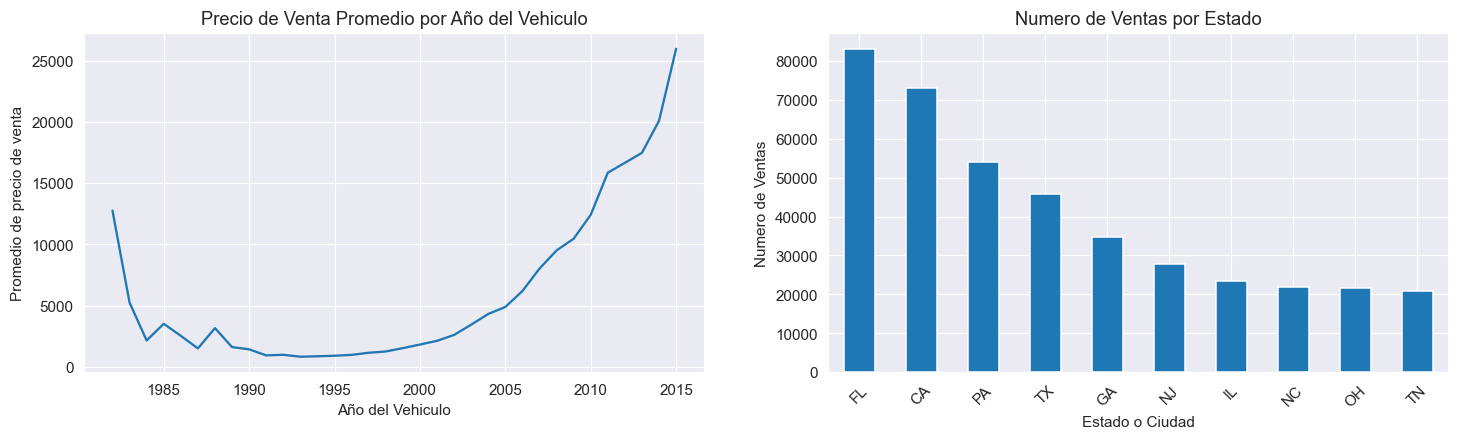

In [12]:
fig, (ax, ax2) = plt.subplots(figsize=[16,4], ncols=2, dpi=110)

df[["year","sellingprice"]].groupby("year").mean().sort_values("year", ascending=False).plot(legend=False, ax=ax)
ax.set_xlabel("Año del Vehiculo")
ax.set_ylabel("Promedio de precio de venta")
ax.set_title("Precio de Venta Promedio por Año del Vehiculo")

df[["state","year"]].groupby("state").count().sort_values("year", ascending=False).iloc[:10].plot.bar(legend=False, ax=ax2)
ax2.tick_params(axis="x", labelrotation=45)
ax2.set_xlabel("Estado o Ciudad")
ax2.set_ylabel("Numero de Ventas")
ax2.set_title("Numero de Ventas por Estado")
plt.savefig("graficos/year_state_price.png");

De acuerdo a los gráficos, se observa que los vehículos modernos y los más antiguos tienen un mayor precio de venta.
Además, se puede observar las 10 ciudades o estados con más vendedores de vehículos.

## Predicción (Machine Learning)

Eliminaremos las columnas que no vamos a utilizar y dividimos los datos en datasets de entrenamiento y de validación

In [13]:
from sklearn.model_selection import train_test_split
drop = ["trim", "state", "seller", "mmr", "day", "saledate"]

X = df.drop(drop, axis=1)
X.dropna(subset="sellingprice", axis=0, inplace=True)
y = X.sellingprice

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

Establecemos un procesador para transformar los datos en números y reemplazando los valores faltantes, de esta forma el modelo de machine learning puede funcionar correctamente.

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

num_cols = X_train.select_dtypes(exclude="object").columns.astype(str).tolist()
low_category_cols = ["transmission"]
high_category_cols = ["make", "model", "body", "color", "interior"]

num_transform = SimpleImputer(strategy="mean")
low_obj_transform = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("onehot", OneHotEncoder(handle_unknown="ignore"))])
high_obj_transform = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=1000))])

processor = ColumnTransformer(transformers=[("num", num_transform, num_cols), ("low_obj", low_obj_transform, low_category_cols), ("high_obj", high_obj_transform, high_category_cols)])

Aplicamos el procesador a los datos de entrenamiento y de validación

In [15]:
X_train_p = processor.fit_transform(X_train)
X_valid_p = processor.transform(X_valid)

Creamos un modelo de machine learning con RandomForestRegressor, utilizaremos el MAE para comparar los datos de la predicción con los datos reales.
Utilizaremos un loop para elegir el número de estimadores que den como resultado un MAE bajo.

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

estimators = [4,8,12,24,48,96]

for est in estimators:
    model = RandomForestRegressor(n_estimators=est, random_state=1, n_jobs=-1)
    model.fit(X_train_p, y_train)
    preds = model.predict(X_valid_p)
    print("EST:", est, "MAE:", mean_absolute_error(y_valid, preds))

EST: 4 MAE: 0.3642029877669055
EST: 8 MAE: 0.29030335783769856
EST: 12 MAE: 0.26142841122476507
EST: 24 MAE: 0.2732105490457141
EST: 48 MAE: 0.2317718958552545
EST: 96 MAE: 0.20608265093328873


Creamos un modelo de machine learning con XGBRegressor, también utilizando el MAE como comparación

In [17]:
from xgboost import XGBRegressor

xmodel = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1, early_stopping_rounds=50, random_state=1)
xmodel.fit(X_train_p, y_train,
             eval_set=[(X_valid_p, y_valid)], verbose=False)

xpreds = xmodel.predict(X_valid_p)
print("MAE:", mean_absolute_error(y_valid, xpreds))

MAE: 68.81566933130242


Juntamos los datos de las predicciones anteriores con los datos reales para compararlos en un gráfico.

In [18]:
test = y_valid.reset_index()

X_pred = pd.DataFrame(xpreds)
X_pred.rename(columns={0 : "XGBRegressor"}, inplace=True)
X_pred["Real Price"] = test["sellingprice"]
X_pred["RandomForestRegressor"] = preds

Realizamos un gráfico para comparar los datos.

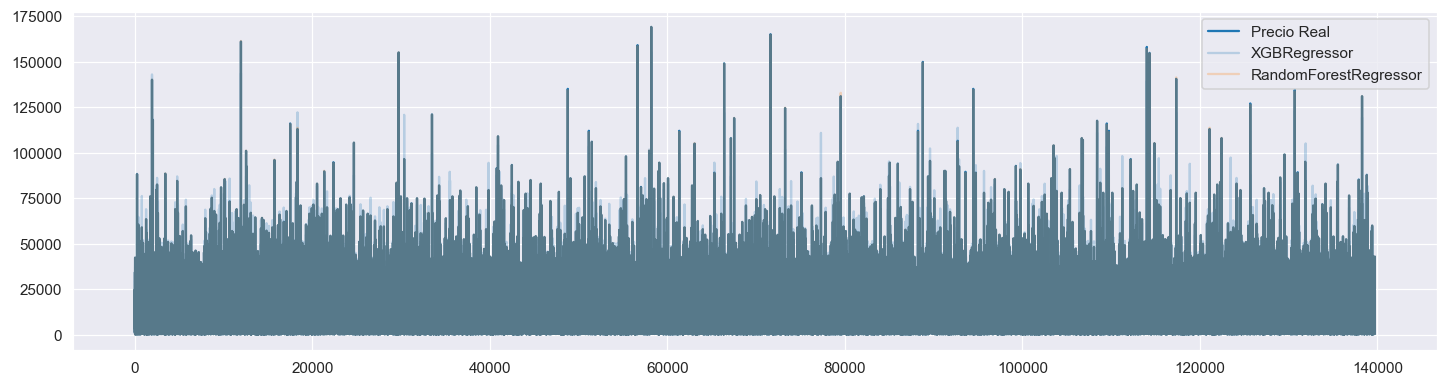

In [19]:
fig, ax = plt.subplots(figsize=[16,4], dpi=110)
#X_pred.iloc[:100].plot(ax=ax, alpha=0.5);
ax.plot(X_pred["Real Price"], label="Precio Real")
ax.plot(X_pred["XGBRegressor"], alpha=0.25, label="XGBRegressor", color="C0")
ax.plot(X_pred["RandomForestRegressor"], alpha=0.25, label="RandomForestRegressor", color="C1")
ax.legend()
plt.savefig("graficos/model_predictions.png");

En el gráfico, se observa los precios reales y los precios que la máquina predijo.  
En el caso del XGBRegressor, en algunos casos toma valores más altos que el precio real.  
En cambio, el RandomForestRegressor, se encuentra opacando a todos los valores del precio real (se ajusta correctamente a los datos), por lo que es el modelo más eficaz para realizar las predicciones.  

# Insights:
1- Las marcas con mayor precio de venta y las marcas con mayor número de ventas  
2- Lunes, martes y miércoles son los días en los que ocurre la mayor cantidad de ventas  
3- El precio de venta aumenta, si la condición del vehículo es alta y si el kilometraje es bajo  
4- Los vehículos modernos y los más antiguos, tienen un mayor precio de venta  
5- Los estados o ciudades con mayor cantidad de vendedores  
  
La creación de un modelo eficaz para predecir el precio de venta para los vehículos, utilizando como variables: La marca, el modelo, la carrocería, el tipo de transmisión, la condición del vehículo, el kilometraje, el color del vehículo, y el color de su interior.  